In [35]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# Loading the data (cat/non-cat)
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_dataset.close()
    test_dataset.close()
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

y = 1, it's a 'cat' picture.


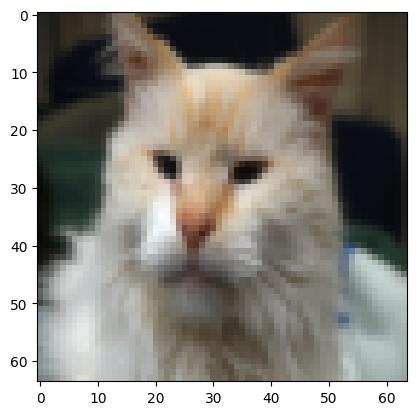

In [37]:
# First, import required libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Load the dataset and assign the returned values
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

# Now show the example picture
index = 27
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y_orig[index]) + ", it's a '" + classes[train_set_y_orig[index]].decode("utf-8") + "' picture.")

In [38]:
# Get the dimensions from the dataset
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y_orig.shape))  # Changed from train_set_y to train_set_y_orig
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y_orig.shape))   # Changed from test_set_y to test_set_y_orig

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209,)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (50,)


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td> m_train </td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>



Reshaping the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).


In [39]:
# Reshape the training and test examples
# Each image is 64x64x3, which is why we get 12288 (64*64*3)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Reshape y values to have shape (1, m)
train_set_y = train_set_y_orig.reshape(1, train_set_y_orig.shape[0])
test_set_y = test_set_y_orig.reshape(1, test_set_y_orig.shape[0])

# Check the shapes
print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.



In [40]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [41]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments:
    z -- A scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    """
    # Clip z to avoid overflow
    z = np.clip(z, -500, 500)
    s = 1/(1 + np.exp(-z))
    return s


In [42]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid_test(sigmoid)

sigmoid([0, 2]) = [0.5        0.88079708]
All tests passed!


In [43]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


In [44]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((dim,1))
    b = 0.0
    
    # YOUR CODE ENDS HERE

    return w, b

In [45]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test_1(initialize_with_zeros)
initialize_with_zeros_test_2(initialize_with_zeros)


w = [[0.]
 [0.]]
b = 0.0
First test passed!
Second test passed!


In [46]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector of size (1, number of examples)
    
    Return:
    grads -- dictionary containing the gradients of the parameters
    cost -- negative log-likelihood cost for logistic regression
    """
    m = X.shape[1]
    
    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    
    # Compute cost
    # Add small epsilon to avoid log(0)
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon)
    cost = -1 * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)) / m
    
    # Backward propagation
    dw = np.dot(X, (A-Y).T) / m
    db = np.sum(A-Y) / m
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


In [47]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.12500404500439652
cost = 0.15900537707692405
All tests passed!


Cost after iteration 0: 0.693147
Cost after iteration 100: 18.674504
Cost after iteration 200: 11.898526
Cost after iteration 300: 11.898526
Cost after iteration 400: 15.204024
Cost after iteration 500: 2.313656
Cost after iteration 600: 0.991548
Cost after iteration 700: 0.000000
Cost after iteration 800: 0.000000
Cost after iteration 900: 0.000000
Cost after iteration 1000: 0.000000
Cost after iteration 1100: 0.000000
Cost after iteration 1200: 0.000000
Cost after iteration 1300: 0.000000
Cost after iteration 1400: 0.000000
Cost after iteration 1500: 0.000000
Cost after iteration 1600: 0.000000
Cost after iteration 1700: 0.000000
Cost after iteration 1800: 0.000000
Cost after iteration 1900: 0.000000
train accuracy: 100.0 %
test accuracy: 72.0 %


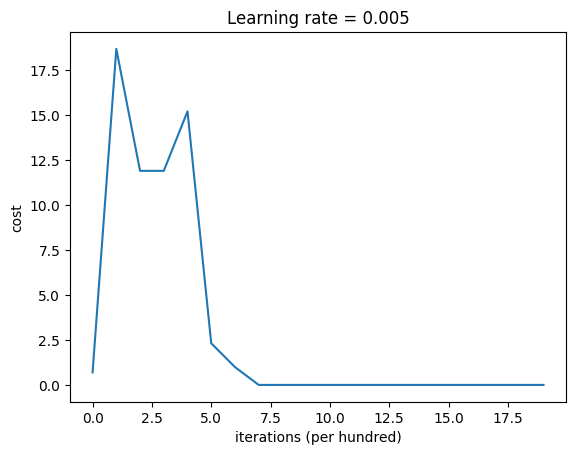

In [48]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=True):
    costs = []
    
    for i in range(num_iterations):
        # Forward and backward propagation
        grads, cost = propagate(w, b, X, Y)
        
        # Get derivatives
        dw = grads["dw"]
        db = grads["db"]
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# Now when you run the model, make sure to set print_cost=True:
logistic_regression_model = model(train_set_x_flatten, train_set_y, 
                                test_set_x_flatten, test_set_y, 
                                num_iterations=2000, 
                                learning_rate=0.005, 
                                print_cost=True)

# Then plot
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundred)')
plt.title("Learning rate = " + str(logistic_regression_model["learning_rate"]))
plt.show()

In [49]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [0.15900537707692405]
All tests passed!


In [50]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T,X)+b)
    
    # YOUR CODE ENDS HERE
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
        if A[0, i] > 0.5 :
            Y_prediction[0,i] = 1;
        else:
            Y_prediction[0,i] = 0
        
        # YOUR CODE ENDS HERE
    
    return Y_prediction

In [51]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

predictions = [[1. 1. 0.]]
All tests passed!


In [52]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "params"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# Now to use the model with our data:
logistic_regression_model = model(train_set_x_flatten, train_set_y, 
                                test_set_x_flatten, test_set_y, 
                                num_iterations=2000, 
                                learning_rate=0.005, 
                                print_cost=True)



Cost after iteration 0: 0.693147
Cost after iteration 100: 18.674504
Cost after iteration 200: 11.898526
Cost after iteration 300: 11.898526
Cost after iteration 400: 15.204024
Cost after iteration 500: 2.313656
Cost after iteration 600: 0.991548
Cost after iteration 700: 0.000000
Cost after iteration 800: 0.000000
Cost after iteration 900: 0.000000
Cost after iteration 1000: 0.000000
Cost after iteration 1100: 0.000000
Cost after iteration 1200: 0.000000
Cost after iteration 1300: 0.000000
Cost after iteration 1400: 0.000000
Cost after iteration 1500: 0.000000
Cost after iteration 1600: 0.000000
Cost after iteration 1700: 0.000000
Cost after iteration 1800: 0.000000
Cost after iteration 1900: 0.000000
train accuracy: 100.0 %
test accuracy: 72.0 %


In [53]:
from public_tests import *

model_test(model)

All tests passed!


In [54]:
logistic_regression_model = model(train_set_x_flatten, train_set_y, 
                                test_set_x_flatten, test_set_y, 
                                num_iterations=2000, 
                                learning_rate=0.001,  # Reduced learning rate
                                print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 9.254424
Cost after iteration 200: 17.187154
Cost after iteration 300: 9.089152
Cost after iteration 400: 11.072501
Cost after iteration 500: 1.652600
Cost after iteration 600: 0.661045
Cost after iteration 700: 0.000000
Cost after iteration 800: 0.000000
Cost after iteration 900: 0.000000
Cost after iteration 1000: 0.000000
Cost after iteration 1100: 0.000000
Cost after iteration 1200: 0.000000
Cost after iteration 1300: 0.000000
Cost after iteration 1400: 0.000000
Cost after iteration 1500: 0.000000
Cost after iteration 1600: 0.000000
Cost after iteration 1700: 0.000000
Cost after iteration 1800: 0.000000
Cost after iteration 1900: 0.000000
train accuracy: 100.0 %
test accuracy: 72.0 %


y = 0, you predicted that it is a "cat" picture.


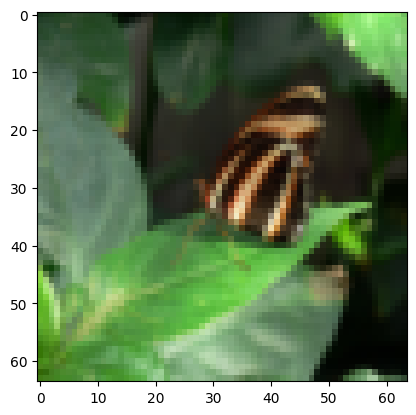

In [55]:
# Example of a picture that was wrongly classified.
index = 5

plt.imshow(test_set_x_flatten[:, index].reshape((num_px, num_px, 3)))
print("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + 
      classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") + "\" picture.")

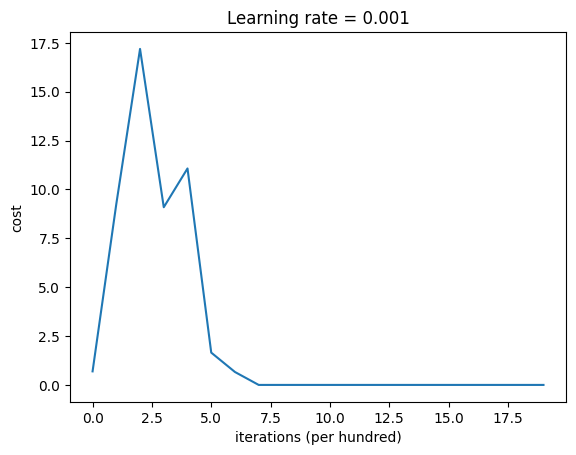

In [56]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundred)')
plt.title("Learning rate = " + str(logistic_regression_model["learning_rate"]))
plt.show()

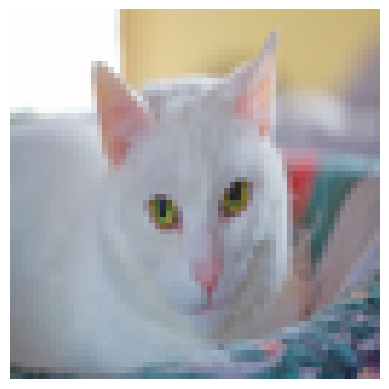

y = 1.0, your algorithm predicts a "cat" picture.


In [62]:
from PIL import Image

# Replace "my_image.jpg" with the name of your image file
my_image = "my_image2.jpg"   # You should change this to your image filename

try:
    # Try to load and process the image
    image = np.array(Image.open(my_image).resize((num_px, num_px)))
    plt.imshow(image)
    plt.axis('off')  # This will hide the axes
    plt.show()
    
    # Preprocess the image
    image = image / 255.                                           # Standardize values to be between 0 and 1
    image = image.reshape((1, num_px * num_px * 3)).T             # Reshape to (12288, 1)
    
    # Make prediction
    my_predicted_image = predict(logistic_regression_model["w"], 
                               logistic_regression_model["b"], 
                               image)
    
    # Print prediction
    prediction_class = classes[int(np.squeeze(my_predicted_image))].decode("utf-8")
    print(f"y = {np.squeeze(my_predicted_image)}, your algorithm predicts a \"{prediction_class}\" picture.")

except FileNotFoundError:
    print(f"Error: The file '{my_image}' was not found. Make sure the image is in the same directory as your notebook.")
except Exception as e:
    print(f"An error occurred: {str(e)}")